## Footprint Matrix 생성 및 Process Mining & 적합성 평가

In [ ]:
# https://github.com/pm4py/pm4py-core/blob/release/notebooks/4_conformance_checking.ipynb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/df_ner_ver2.csv')
df.head()

,review_ID,date,category
0,review_03283,2024-01-31 21:20:47,CIVILIZATION
1,review_03283,2024-01-31 21:20:48,CIVILIZATION
2,review_02512,2024-01-30 10:48:42,CIVILIZATION
3,review_02512,2024-01-30 10:48:43,ORGANIZATION
4,review_02512,2024-01-30 10:48:44,DATE


In [ ]:
import numpy as np
import pandas as pd

def create_footprint_matrix(event_logs):
    # Extract unique activities
    activities = sorted(set(log[1] for log in event_logs))
    n_activities = len(activities)

    # Create a dictionary to map activities to indices
    activity_to_index = {activity: i for i, activity in enumerate(activities)}

    # Initialize the footprint matrix
    footprint_matrix = np.zeros((n_activities, n_activities), dtype=int)

    # Populate the footprint matrix
    for i in range(len(event_logs) - 1):
        current_case, current_activity, _ = event_logs[i]
        next_case, next_activity, _ = event_logs[i + 1]

        if current_case == next_case:
            current_index = activity_to_index[current_activity]
            next_index = activity_to_index[next_activity]
            footprint_matrix[current_index][next_index] += 1

    # Create a DataFrame for better visualization
    footprint_df = pd.DataFrame(footprint_matrix, index=activities, columns=activities)

    return footprint_df

In [ ]:
#리스트 변경
df.values.tolist()

[['review_03283', '2024-01-31 21:20:47', 'CIVILIZATION'],
 ['review_03283', '2024-01-31 21:20:48', 'CIVILIZATION'],
 ['review_02512', '2024-01-30 10:48:42', 'CIVILIZATION'],
 ['review_02512', '2024-01-30 10:48:43', 'ORGANIZATION'],
 ['review_02512', '2024-01-30 10:48:44', 'DATE'],
 ['review_02512', '2024-01-30 10:48:45', 'ARTIFACT'],
 ['review_02512', '2024-01-30 10:48:46', 'CIVILIZATION'],
 ['review_02512', '2024-01-30 10:48:47', 'QUANTITY'],
 ['review_02512', '2024-01-30 10:48:48', 'ORGANIZATION'],
 ['review_09969', '2024-01-30 11:38:06', 'DATE'],
 ['review_09969', '2024-01-30 11:38:07', 'TIME'],
 ['review_09969', '2024-01-30 11:38:08', 'QUANTITY'],
 ['review_03172', '2024-01-28 23:07:15', 'CIVILIZATION'],
 ['review_03172', '2024-01-28 23:07:16', 'CIVILIZATION'],
 ['review_18379', '2024-01-28 18:09:50', 'ARTIFACT'],
 ['review_18379', '2024-01-28 18:09:51', 'ANIMAL'],
 ['review_18379', '2024-01-28 18:09:52', 'ANIMAL'],
 ['review_18379', '2024-01-28 18:09:53', 'ANIMAL'],
 ['review_1837

In [ ]:
# Create and display the footprint matrix
footprint_matrix = create_footprint_matrix(df[['review_ID','category','date']].values.tolist())
print(footprint_matrix)
#엑셀파일로 저장 하기(FOOTPRINT)
footprint_matrix.to_excel('footprint_matrix.xlsx')

              ANIMAL  ARTIFACT  CIVILIZATION  COUNTRY  DATE  LOCATION  \
ANIMAL             9         2             9        0     1         0   
ARTIFACT           3         4             5        0     1         0   
CIVILIZATION      14         3            52        0     8         1   
COUNTRY            0         0             0        0     0         0   
DATE               4         1             4        0    11         0   
LOCATION           0         0             1        0     0         0   
MATERIAL           0         0             1        0     0         0   
OCCUPATION         0         0             1        0     0         0   
ORGANIZATION       0         2             6        0     1         0   
PERSON             0         0             0        0     0         0   
QUANTITY           2         2            11        1     2         0   
TERM               4         0             3        0     2         0   
THEORY             0         0             0       

In [ ]:

footprint_matrix.sum().sum()

278

### pm4py

In [ ]:
# !pip install pm4py

In [ ]:
event_logs_df = pd.DataFrame(df[['review_ID','category','date']].values.tolist(), columns=['case_id', 'activity', 'timestamp'])
event_logs_df.head()

,case_id,activity,timestamp
0,review_03283,CIVILIZATION,2024-01-31 21:20:47
1,review_03283,CIVILIZATION,2024-01-31 21:20:48
2,review_02512,CIVILIZATION,2024-01-30 10:48:42
3,review_02512,ORGANIZATION,2024-01-30 10:48:43
4,review_02512,DATE,2024-01-30 10:48:44


In [ ]:
event_logs_df.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   case_id    420 non-null    object
 1   activity   420 non-null    object
 2   timestamp  420 non-null    object
dtypes: object(3)
memory usage: 21.2+ KB


In [ ]:
# event_logs_df의 타임스탬프의 형식을 date로 바꿈

import pandas as pd
event_logs_df['timestamp'] = pd.to_datetime(event_logs_df['timestamp'])
event_logs_df.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   case_id    420 non-null    object
 1   activity   420 non-null    object
 2   timestamp  420 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 15.0+ KB


In [ ]:
event_logs_df.head()

,case_id,activity,timestamp
0,review_03283,CIVILIZATION,2024-01-31 21:20:47
1,review_03283,CIVILIZATION,2024-01-31 21:20:48
2,review_02512,CIVILIZATION,2024-01-30 10:48:42
3,review_02512,ORGANIZATION,2024-01-30 10:48:43
4,review_02512,DATE,2024-01-30 10:48:44


In [ ]:
import pandas as pd
import pm4py
event_logs_df_pm = pm4py.format_dataframe(event_logs_df, case_id='case_id',activity_key='activity',
                             timestamp_key='timestamp')
event_logs_df_pm

,case_id,activity,timestamp,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
0,review_00079,QUANTITY,2024-01-08 08:38:53,review_00079,QUANTITY,2024-01-08 08:38:53,0,0
1,review_00079,ARTIFACT,2024-01-08 08:38:54,review_00079,ARTIFACT,2024-01-08 08:38:54,1,0
2,review_00079,ARTIFACT,2024-01-08 08:38:55,review_00079,ARTIFACT,2024-01-08 08:38:55,2,0
3,review_00079,ANIMAL,2024-01-08 08:38:56,review_00079,ANIMAL,2024-01-08 08:38:56,3,0
4,review_00113,QUANTITY,2024-03-22 01:58:16,review_00113,QUANTITY,2024-03-22 01:58:16,4,1
...,...,...,...,...,...,...,...,...
415,review_25821,ANIMAL,2024-04-11 07:01:21,review_25821,ANIMAL,2024-04-11 07:01:21,415,140
416,review_25821,ANIMAL,2024-04-11 07:01:22,review_25821,ANIMAL,2024-04-11 07:01:22,416,140
417,review_25864,CIVILIZATION,2024-04-29 18:01:33,review_25864,CIVILIZATION,2024-04-29 18:01:33,417,141
418,review_25864,CIVILIZATION,2024-04-29 18:01:34,review_25864,CIVILIZATION,2024-04-29 18:01:34,418,141


- DFG

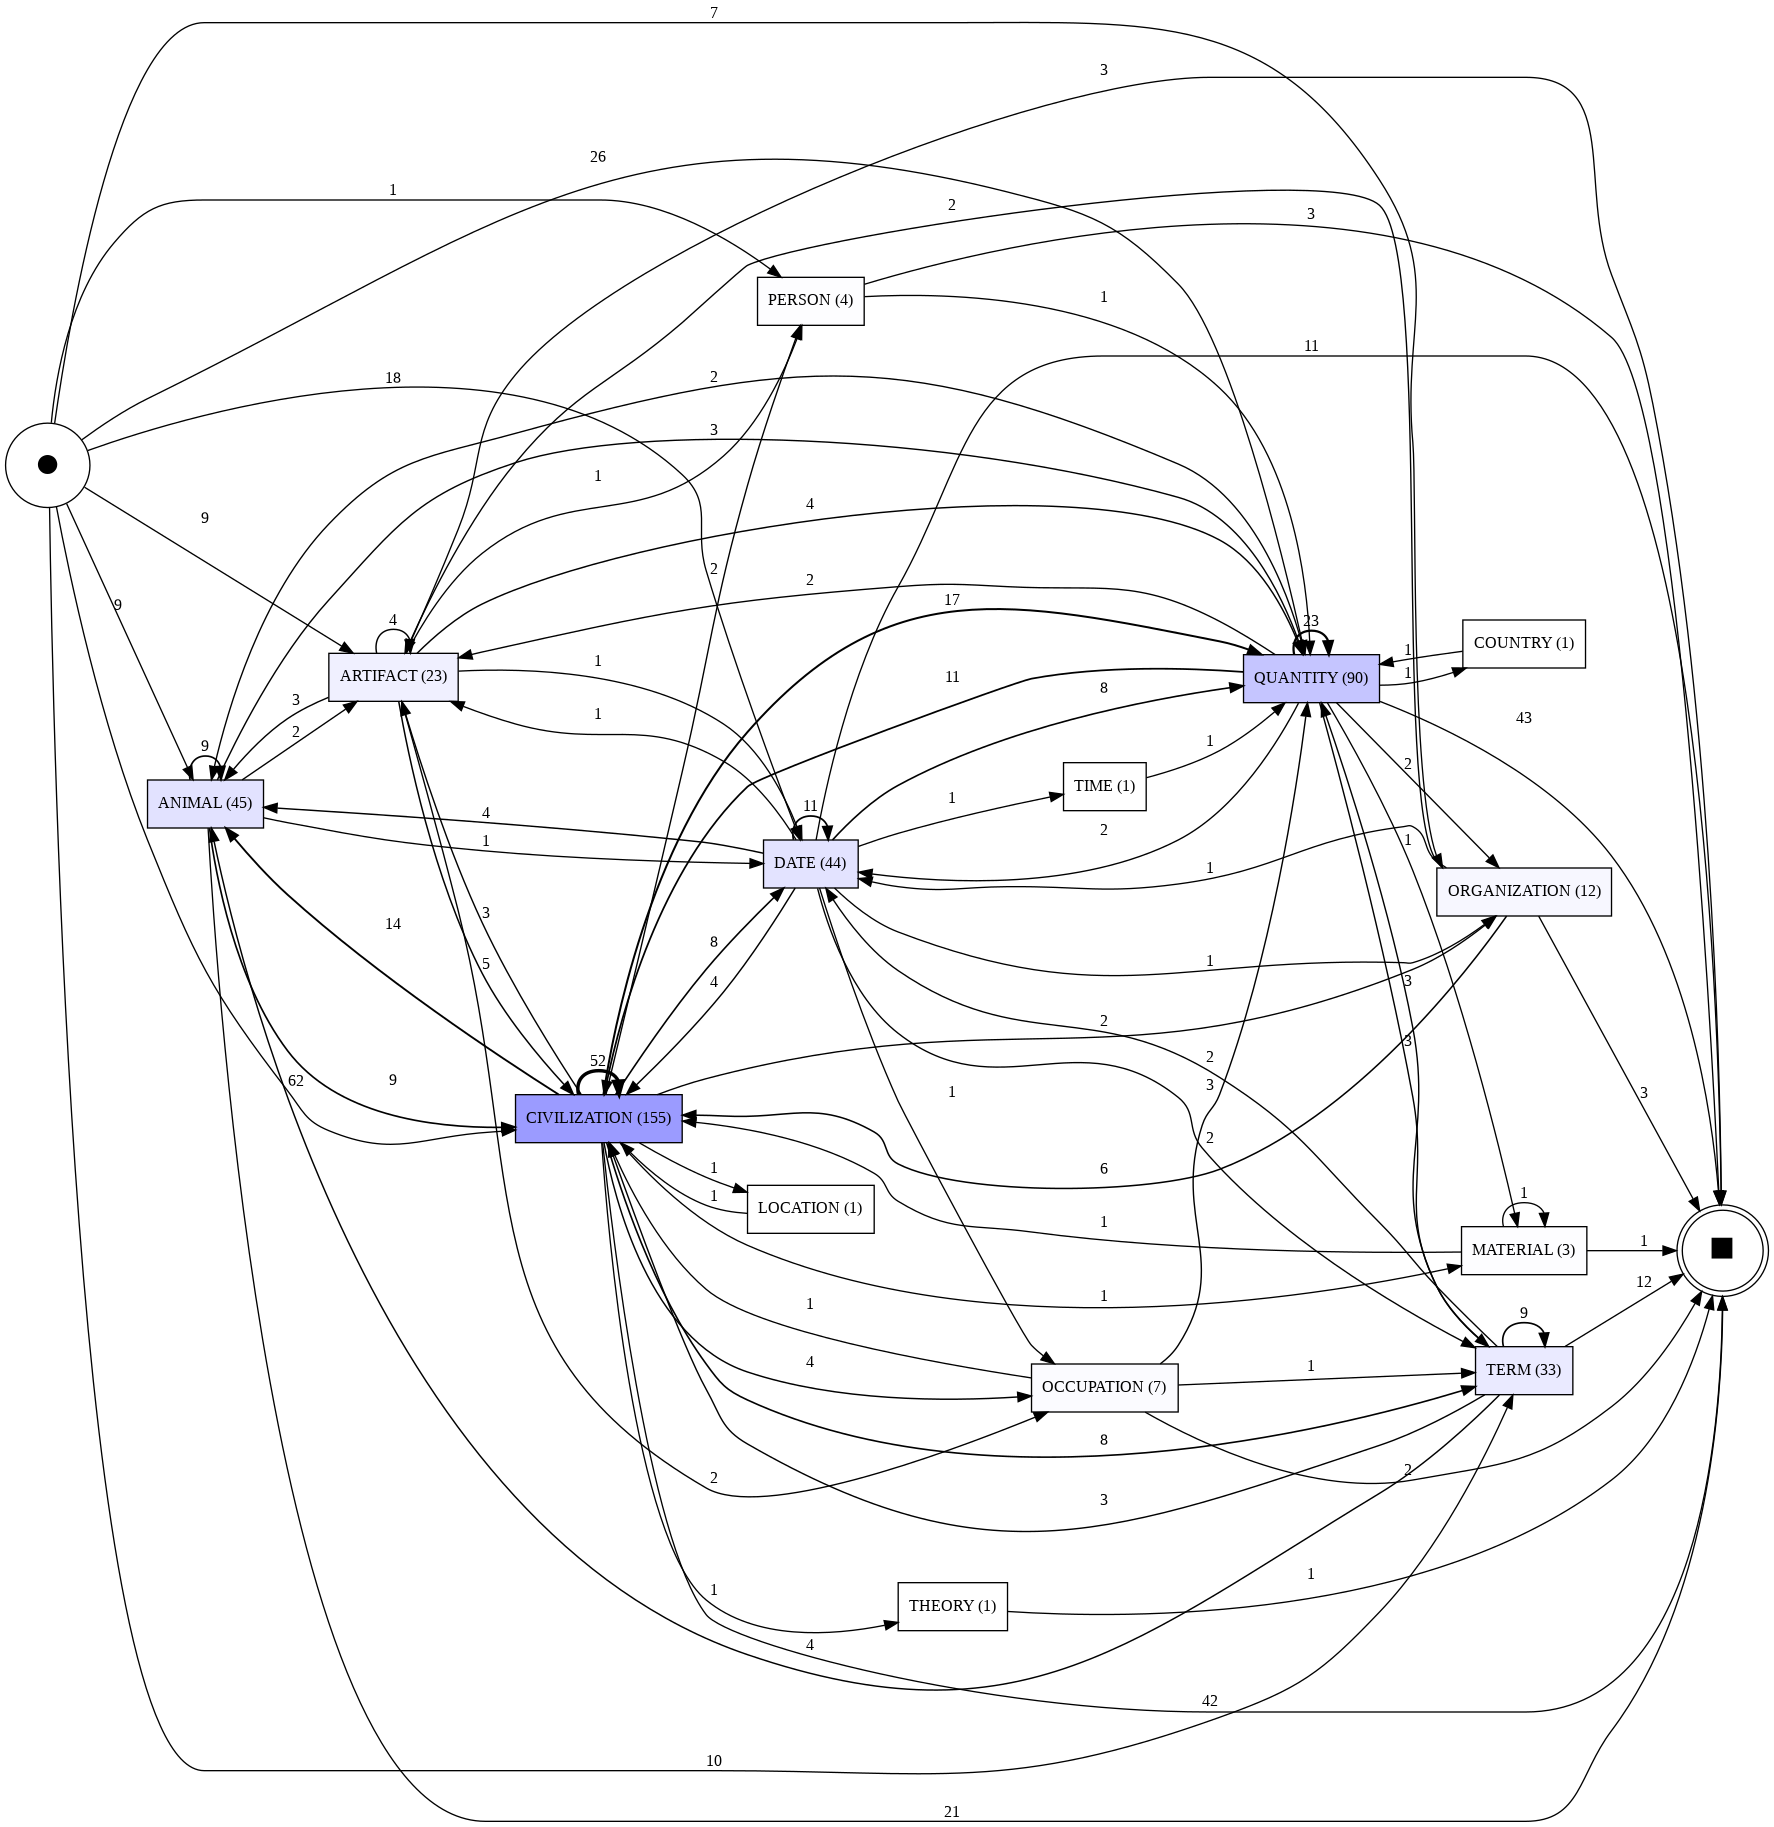

In [ ]:
# Directly Follows Graph (DFG)
dfg, start_activities, end_activities = pm4py.discover_dfg(event_logs_df_pm)
pm4py.view_dfg(dfg, start_activities, end_activities)  #풋프린트와 관련된 그래프 1, 2 저장해서 산출물 올리기

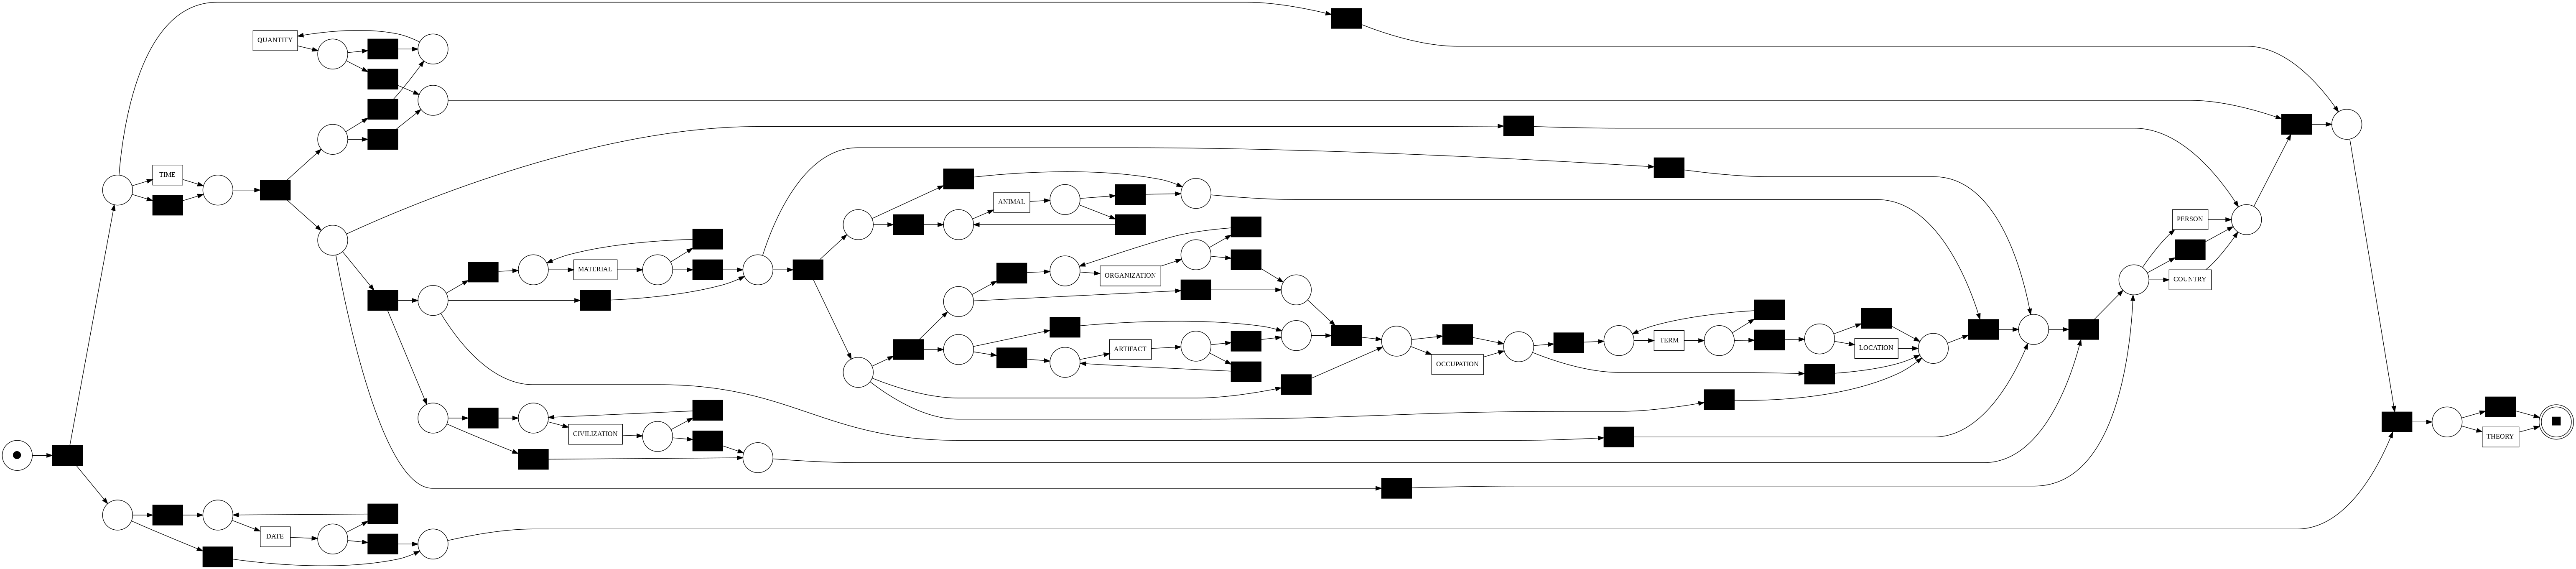

In [ ]:
pn, im, fm = pm4py.discover_petri_net_inductive(event_logs_df_pm)
pm4py.view_petri_net(pn, im, fm)

In [ ]:
pm4py.fitness_token_based_replay(event_logs_df_pm, pn, im, fm)

replaying log with TBR, completed traces ::   0%|          | 0/85 [00:00<?, ?it/s]

{'perc_fit_traces': 100.0,
 'average_trace_fitness': 1.0,
 'log_fitness': 1.0,
 'percentage_of_fitting_traces': 100.0}